#### 1. Importing Libraries


In [160]:
import pandas as pd
import seaborn as sns 
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.model_selection import train_test_split

#### 2. Loading and Exploring the Data

In [161]:
df = pd.read_csv('data/Summary of Weather.csv', low_memory=False)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [163]:
df.isna().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

#### 3. Data Cleaning and Preparation

In [164]:
columns_to_drop = [col for col in df.columns if df[col].isna().sum() >= 0.05 * len(df)]
df.drop(columns=columns_to_drop, inplace=True)

In [165]:
columns_to_drop_2 =['STA','Date','YR','MO','DA','PRCP','Precip','MAX','MEA','MIN','SNF']
df.drop(columns=columns_to_drop_2, inplace=True)

In [166]:
df.loc[df['Snowfall']=='#VALUE!','Snowfall'] = np.nan
df.dropna(axis=0,inplace=True)

In [167]:
df[['Snowfall']] = df[['Snowfall']].astype(float)

#### 4. Scaling or Normalizing Data


MaxTemp     1.000000
MinTemp     0.870664
MeanTemp    0.966908
Snowfall   -0.336999
Name: MaxTemp, dtype: float64

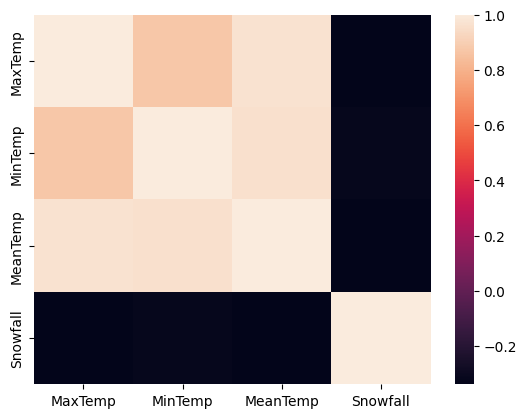

In [168]:
sns.heatmap(df.corr())
df.corr()['MaxTemp']
# We can see MinTemp and MeanTemp, have strong correlation with MaxTeam

#### 5. Model Building and Training


In [169]:
x_train, x_test,y_train, y_test = train_test_split(df.drop(columns='MaxTemp'), df['MaxTemp'], test_size=0.25)

In [170]:
info = []
df_pred = []
def save_metrics(model, y_test,predictions):
    r2 = r2_score(y_test,predictions)
    rmse = root_mean_squared_error(y_test,predictions)
    mae = mean_absolute_error(y_test,predictions)

    info.append([model,r2,rmse,mae])
    
    df_pred.append(predictions.reshape(-1,1))

In [171]:
linear_models = [LinearRegression, Lasso]

for temp in linear_models:
    
    model_temp = temp()  # Instanciar el modelo
    model_temp.fit(x_train, y_train)  # Ajustar el modelo con los datos de entrenamiento

    predictions = model_temp.predict(x_test)  # Hacer predicciones sobre los datos de prueba

    # Guardar métricas con el nombre del modelo
    save_metrics(f'{temp.__name__}', y_test, predictions)

#### 6. Model Evaluation

In [173]:
pd.DataFrame(info, columns=['model','r2','rmse','mae'])

,model,r2,rmse,mae
0,LinearRegression,0.986014,0.997090,0.397755
1,Lasso,0.974618,1.343194,0.925524


In [174]:
combined_array = np.hstack([y_test.values.reshape(-1,1), df_pred[0], df_pred[1]])
pd.DataFrame(combined_array,columns=['Test','Linear Predict','Lasso Predict'])

,Test,Linear Predict,Lasso Predict
0,32.777778,31.840619,30.526005
1,0.000000,0.658148,1.939694
2,22.222222,22.198503,21.824550
3,32.222222,31.591857,31.429440
4,24.444444,24.034267,22.274601
...,...,...,...
29454,30.555556,30.553872,30.623873
29455,28.888889,29.696041,30.689119
29456,33.333333,32.809994,33.105819
29457,31.666667,31.711959,32.009982
